In [ ]:
NAME = "Amit Sutradhar"
ID = "22201054"
SECTION = "18"

# Task1.


Let $f(x)$ be a function of $x$.

$$f(x) = x^5 + 2.5x^4 - 2x^3 -6x^2 + x + 2\tag{1.1}$$

a. Plot the function for $$-2.5 \le x \le 1.5$$

b. What is the actual slope of $f(x)$ at $x = 0 , -1.18625$ ?  Print $f'(x)$ and plot $f'(x)$ at $ -2 \le x \le 1.2$.

For c to e, assume step size is $0.1$.

c. Use forward differntiation to figure out the slope at $x = 0 , -1.18625$.

d. Use backward differntiation to figure out the slope at $x = 0 , -1.18625$.

e. Use central differntiation to figure out the slope at $x = 0 , -1.18625$.

f. Compare the error of each method with actual differentiation at $x = 0 , -1.18625$ by showing in a Pandas Dataframe.

g. plot error vs h curves with proper label and color for each method at $x = 0$ and $h = [0.55, 0.3, .17, 0.1, 0.055, 0.03, 0.017, 0.01]$.


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from numpy.polynomial import Polynomial

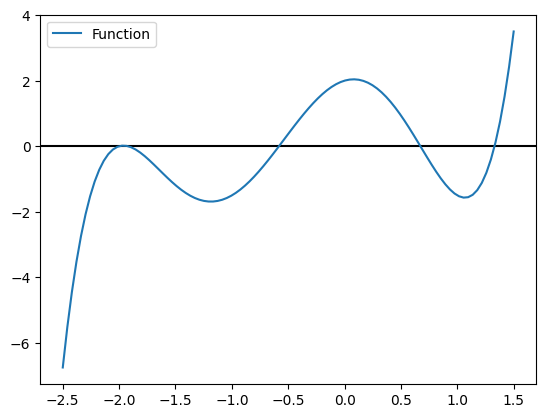

In [ ]:
# a

fig, ax = plt.subplots()
ax.axhline(y=0, color='k')

p = Polynomial([2, 1, -6, -2, 2.5, 1])
data = p.linspace(domain=[-2.5, 1.5])
ax.plot(data[0], data[1], label='Function')

ax.legend()

The actual slope of f(x) at x = 0.0 is 1.0
The actual slope of f(x) at x = -1.18625 is -9.340808105218201e-06


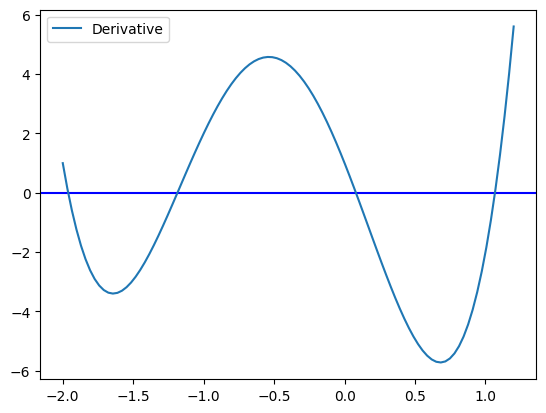

In [ ]:
# b
fig, ax = plt.subplots()
ax.axhline(y=0, color='b')

pol = Polynomial([2, 1, -6, -2, 2.5, 1])

p_prime = pol.deriv()
data = p_prime.linspace(domain=[-2, 1.2])
ax.plot(data[0], data[1], label='Derivative')

ax.legend()

x = np.array([0, -1.18625])
for i in x:
    print(f"The actual slope of f(x) at x = {i} is {p_prime(i)}")

In [ ]:
# c
def forward_diff(f, h, x):
    return (f(x+h) - f(x)) / h
h = 0.1
x = np.array([0, -1.18625])
for i in x:
    print(f"The slope of f(x) at x = {i} using forward differentiation is {forward_diff(p, h, i)}")

The slope of f(x) at x = 0.0 using forward differentiation is 0.3826000000000018
The slope of f(x) at x = -1.18625 using forward differentiation is 0.5520088838012782


In [ ]:
# d
def backward_diff(f, h, x):
    return (f(x) - f(x-h)) / h
h = 0.1
x = np.array([0, -1.18625])

for i in x:
    print(f"The slope of f(x) at x = {i} using backward differentiation is {backward_diff(p, h, i)}")


The slope of f(x) at x = 0.0 using backward differentiation is 1.5776000000000012
The slope of f(x) at x = -1.18625 using backward differentiation is -0.5476397529174859


In [ ]:
# e
def central_diff(f, h, x):
    return (f(x+h) - f(x-h)) / (2*h)

h = 0.1
x = np.array([0, -1.18625])

for i in x:
    print(f"The slope of f(x) at x = {i} using central differentiation is {central_diff(p, h, i)}")

The slope of f(x) at x = 0.0 using central differentiation is 0.9801000000000015
The slope of f(x) at x = -1.18625 using central differentiation is 0.002184565441896158


In [ ]:
# f
def compare(f, f_prime, h, x):
    Result = {'x' : [], "Actual" : [],"A": [], "M" : [], "T": [], "A Error" : [], "M Error": [], "T Error" : []}
    a_error = np.array([])
    m_error = np.array([])
    t_error = np.array([])

    for i in x:
        a_error = np.append(a_error, (forward_diff(p, h, i) - p_prime(i)))
        m_error = np.append(m_error, (backward_diff(p, h, i) - p_prime(i)))
        t_error = np.append(t_error, (central_diff(p, h, i) - p_prime(i)))

        Result['x'].append(i)
        Result['Actual'].append(p_prime(i))

        Result['A'].append(forward_diff(p, h, i))
        Result['M'].append(backward_diff(p, h, i))
        Result['T'].append(central_diff(p, h, i))

    Result['A Error'] = a_error
    Result['M Error'] = m_error
    Result['T Error'] = t_error

    return pd.DataFrame(Result)
x = np.array([0, -1.18625])
compare(p, p_prime, h, x)

,x,Actual,A,M,T,A Error,M Error,T Error
0,0.00000,1.000000,0.939803,1.059798,0.999800,-0.060197,0.059798,-0.000200
1,-1.18625,-0.000009,0.055334,-0.055311,0.000012,0.055343,-0.055301,0.000021


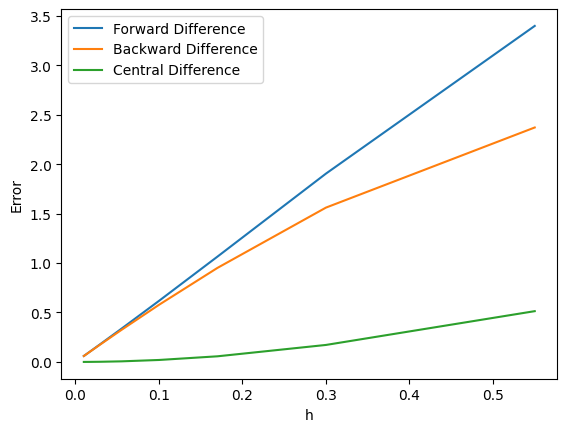

In [ ]:
# g
h_vals = [0.55, 0.3, 0.17, 0.1, 0.055, 0.03, 0.017, 0.01]
a_errors = []
m_errors = []
t_errors = []

for h in h_vals:
    a_error = abs(p_prime(0) - forward_diff(p, h, 0))
    m_error = abs(p_prime(0) - backward_diff(p, h, 0))
    t_error = abs(p_prime(0) - central_diff(p, h, 0))

    a_errors.append(a_error)
    m_errors.append(m_error)
    t_errors.append(t_error)

plt.plot(h_vals, a_errors, label='Forward Difference')
plt.plot(h_vals, m_errors, label='Backward Difference')
plt.plot(h_vals, t_errors, label='Central Difference')
plt.xlabel('h')
plt.ylabel('Error')
plt.legend()


# Task 2.

a. Propose a better technique for numerical differentiation that provides higher accuracy than the methods you have worked so far. You need to write a function for your proposed technique.

Let, $$f(x) = x^5 + 2.5x^4 - 2x^3 -6x^2 + x + 2\tag{2.1}$$

b. Using your proposed method, what is the slope of $f(x)$  at $x=0,−1.18625$ and step size = 0.1?

c. Compare the error of your method with  actual, forward, backward and central differentiation at  $x=0,−1.18625$  by showing in Pandas Dataframe.

d. Plot actual derivative, Forward derivative, Backward derivative, Central derivative and the derivative from your proposed method in a graph. Here, $$h = 0.1, -2 \le x \le 1.2$$

In [ ]:
# a
Proposed_Method_Name = "Richardson Extrapolation"

#Write Code here
def dh(f, h, x):
    dh = np.array([])
    CD = central_diff(f, h, x)
    dh = np.append(dh, CD)

    return dh

def dh1(f, h, x):
    return (4*dh(f, h/2, x) - dh(f, h, x)) / 3

In [ ]:
# b
x = np.array([0,-1.18625])
h = 0.1

for i in x:
    print(f"The slope of f(x) at x = {i} using {Proposed_Method_Name} is {dh1(p, h, i)[0]}")

The slope of f(x) at x = 0.0 using Richardson Extrapolation is 0.9999750000000011
The slope of f(x) at x = -1.18625 using Richardson Extrapolation is -3.4340808106048115e-05


In [ ]:
# c
def compare1(f, f_prime, h, x):
    Result = {'x' : [], "Actual" : [],"A": [], "M" : [], "T": [], "I": [],"A Error" : [], "M Error": [], "T Error" : [], "I Error" : []}
    a_error = np.array([])
    m_error = np.array([])
    t_error = np.array([])
    i_error = np.array([])


    for i in x:
        a_error = np.append(a_error, (forward_diff(p, h, i) - p_prime(i)))
        m_error = np.append(m_error, (backward_diff(p, h, i) - p_prime(i)))
        t_error = np.append(t_error, (central_diff(p, h, i) - p_prime(i)))
        i_error = np.append(i_error, (dh1(p, h, i)[0] - f_prime(i)))
        Result['x'].append(i)
        Result['Actual'].append(p_prime(i))

        Result['A'].append(forward_diff(p, h, i))
        Result['M'].append(backward_diff(p, h, i))
        Result['T'].append(central_diff(p, h, i))
        Result['I'].append(dh1(p, h, i)[0])

    Result['A Error'] = a_error
    Result['M Error'] = m_error
    Result['T Error'] = t_error
    Result['I Error'] = i_error

    return pd.DataFrame(Result)

compare1(p, p_prime, h, x)

,x,Actual,A,M,T,I,A Error,M Error,T Error,I Error
0,0.00000,1.000000,0.382600,1.57760,0.980100,0.999975,-0.617400,0.57760,-0.019900,-0.000025
1,-1.18625,-0.000009,0.552009,-0.54764,0.002185,-0.000034,0.552018,-0.54763,0.002194,-0.000025


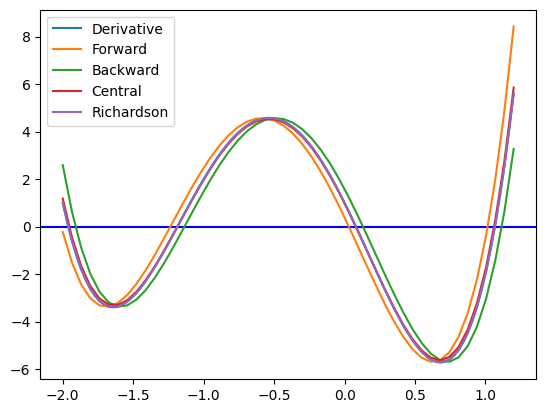

In [ ]:
# d
fig, ax = plt.subplots()
ax.axhline(y=0, color='b')

p = Polynomial([2, 1, -6, -2, 2.5, 1])
p_prime = p.deriv()
data = p_prime.linspace(domain=[-2, 1.2])
ax.plot(data[0], data[1], label='Derivative')

h = 0.1
x = np.linspace(-2,1.2,50, endpoint = True)
y = forward_diff(p, h, x)
ax.plot(x, y, label = 'Forward')

y = backward_diff(p, h, x)
ax.plot(x, y, label = 'Backward')

y = central_diff(p, h, x)
ax.plot(x, y, label = 'Central')

y = dh1(p, h, x)
ax.plot(x, y, label = 'Richardson')

ax.legend()

# Task 3.

Given,
$f(x) = \frac{-1}{13}x^3 + 2x^2 - 9.5x - 10\tag{3.1}$

a. (i) Write a python function that takes an input function and a list of intervals as a list and returns a dictionary that contains either root exists or not in each intervals.
Determine if root exists in $[(-20,-10),(-10,0), (0,10), (10,20), (20,30)]$.

(ii) Verify your method by ploting the function and the intervals.

b. Using Bisection method, find roots of the function $3.1$ in these intervals $[(−20,−10),(−10,0),(0,10),(10,20),(20,30)]$ where root exists. The value of machine epsilon is, $\epsilon < 10^{-6}$


You can reuse the function of Task 3.a to find out the intervals that contains root.
Note: You should return 3 different roots for the function (3.1).

c. Plot the f(x) along with the roots to check if your method is working correctly.

In [ ]:
# a
intervals = [(-20,-10),(-10,0), (0,10), (10,20), (20,30)]  #  This snippet will be given in the question
f = Polynomial([-10, -9.5, 2, -1/13])
root_dic = {}
for i in intervals:
    if f(i[0]) * f(i[1]) < 0:
        root_dic[i] = "Root Exists"
    else:
        root_dic[i] = "Root Does Not Exist"

print(root_dic)

{(-20, -10): 'Root Does Not Exist', (-10, 0): 'Root Exists', (0, 10): 'Root Exists', (10, 20): 'Root Exists', (20, 30): 'Root Does Not Exist'}


In [ ]:
def interval_root_checker(f, intervals):
  result = {}
  for a, b in intervals:
    if f(a) * f(b) < 0:
      result[(a, b)] = "Root Exists"
    else:
      result[(a, b)] = "Root Doesn't Exist"

  return result

f = Polynomial([-10, -9.5, 2, -1/13])
intervals = [(-20,-10),(-10,0), (0,10), (10,20), (20,30)]
interval_root_checker(f, intervals)

{(-20, -10): "Root Doesn't Exist",
 (-10, 0): 'Root Exists',
 (0, 10): 'Root Exists',
 (10, 20): 'Root Exists',
 (20, 30): "Root Doesn't Exist"}

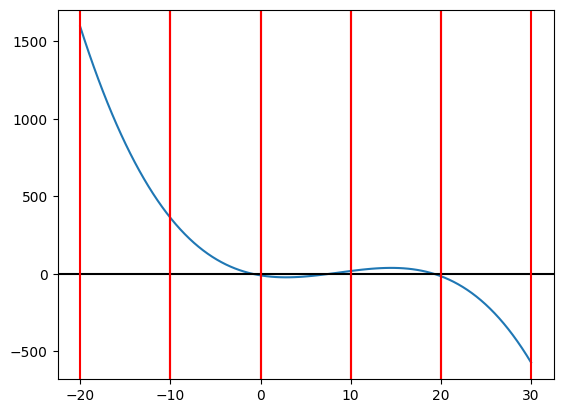

In [ ]:
x = np.linspace(-20,30,100)
y = f(x)

plt.plot(x,y)
plt.axhline(y=0, color='k')
for a,b in intervals:
  plt.axvline(x=a, color='r')
  plt.axvline(x=b, color='r')
plt.show()

In [ ]:
# b
def bisection(f,intervals,e):
  roots = []
  for interval in intervals:
    a, b = interval
    if f(a) * f(b) <= 0:
      while abs(b-a)/2 > e:
        mid = (a + b) / 2
        if f(mid)==0:
          return mid
        elif f(a) * f(mid) < 0:
          b = mid
        else:
          a = mid
      root=(a+b)/2
      roots.append(root)
      if len(roots)==3:
        break
    else:
      print(f"No root found in interval {interval}")

  return roots


f = Polynomial([-10, -9.5, 2, -1/13])
intervals = [(-20,-10),(-10,0), (0,10), (10,20), (20,30)]
e = 10**-6
roots = bisection(f,intervals,e)
print("Three roots are: ")
print(roots)

No root found in interval (-20, -10)
Three roots are: 
[-0.8829361200332642, 7.658982872962952, 19.22395408153534]


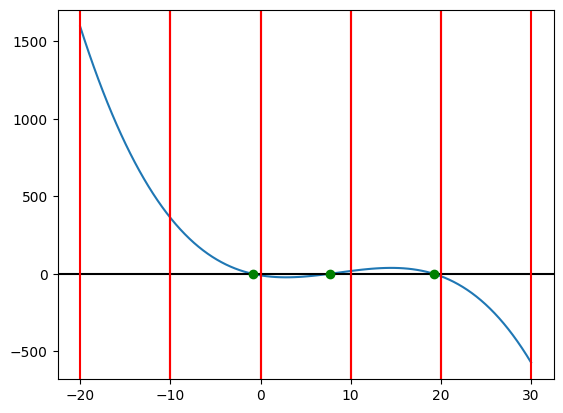

In [ ]:
# c
x = np.linspace(-20,30,100)
y = f(x)

plt.plot(x,y)
plt.axhline(y=0, color='k')
for a,b in intervals:
  plt.axvline(x=a, color='r')
  plt.axvline(x=b, color='r')


plt.plot(roots,[0]*len(roots), 'go')
plt.show()

Task4.


Let $f(x)$ be a function of $x$.

$$f(x) = x^5 + 2.5x^4 - 2x^3 -6x^2 + \frac{x}{2} + 2\tag{4.1}$$

a. Find the actual roots of $f(x)$ and print them.

b. Plot the function for $-2.5 \le x \le 1.5$, also point out the the found roots in the plot

c. The following $g_{1}(x)$ is given which is derived from Eq$(4.1)$, \\
   Use Contraction Mapping Theorem and calculate the value of λ for the given $g(x)$ $$g_{1}(x)= \frac{1}{2}(-x^5 - 2.5x^4 + 2x^3 + 6x^2 - 2)\tag{4.2}$$

d. Compute the convergence/divergence table using all the calculated roots for the given $g_{1}(x)$ and prove the whole $g_{1}(x)$ is divergent

Given,

$$g_{2}(x)= \sqrt{\frac{1}{6}(x^5 + 2.5x^4 -2x^3 + \frac{1}{2}x + 2)}\tag{4.3}$$
$$g_{3}(x) = \sqrt[\leftroot{-1}\uproot{2}\scriptstyle 4]{\frac{1}{2.5}(-x^5 + 2x^3 + 6x^2 - \frac{1}{2}x - 2)}\tag{4.4}$$
e. Derive 2 more separate $g_{4}(x)$ and $g_{5}(x)$ from the given $f(x)$. Implement $g_{2}(x)$, $g_{3}(x)$, $g_{4}(x)$ and $g_{5}(x)$.

f. Apply Fixed Point Method on the $g_{2}(x)$, $g_{3}(x)$, $g_{4}(x)$ and $g_{5}(x)$. and find the approprate roots, show 20 iterations for each $g(x)$ for $x_{0}$ = 0.8 and show the convergence table using data from each iteration

g. Plot the $g(x)$s where actual roots were found along with $f(x)$.

In [ ]:
# a
f = Polynomial([2.0, 1/2, -6, -2.0, 2.5, 1.0])
roots = f.roots()

print(f"The roots are: {roots}")

The roots are: [-2.22027583 -1.61803399 -0.65499178  0.61803399  1.37526761]


[-2.22027583 -1.61803399 -0.65499178  0.61803399  1.37526761]


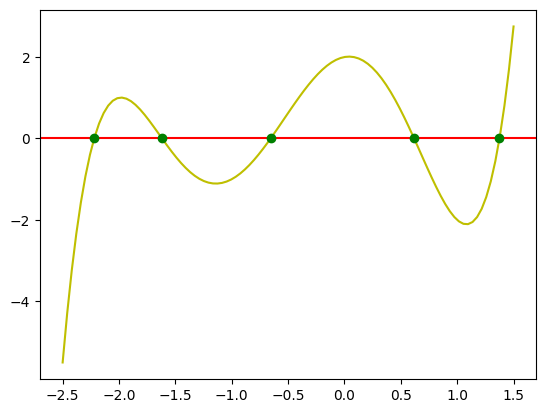

In [ ]:
# b
x = np.linspace(-2.5, 1.5, 100)
y = f(x)
dictionary = {
    "x" : x,
    "y" : y
}
plt.axhline(y=0, color='r')
plt.plot(x, y,'y')
plt.plot(f.roots(), [0.0]*5, 'go')
print(f.roots())

In [ ]:
# c
g1 = Polynomial([-4,0,12,4,-5,-2])
g1_prime = g1.deriv()

print(g1.roots())
for i in f.roots():
  print(f"λ = {g1_prime(i)}")

[-2.31309903 -1.41421356 -0.75756902  0.57066806  1.41421356]
λ = -18.240591656040717
λ = 8.763932022500208
λ = -6.792148146259908
λ = 13.236067977499795
λ = -32.092260197699055


In [ ]:
# d
roots = g1.roots()
print(g1.roots())
for root in roots:
    g1_derivative_value = g1_prime(root)
    if abs(g1_derivative_value) < 1:
        print(f"At root {root:.3f}, g1(x) is converging with λ = {g1_derivative_value:.3f}.")
    else:
        print(f"At root {root:.3f}, g1(x) is diverging with λ = {g1_derivative_value:.3f}.")

[-2.31309903 -1.41421356 -0.75756902  0.57066806  1.41421356]
At root -2.313, g1(x) is diverging with λ = -30.059.
At root -1.414, g1(x) is diverging with λ = 6.627.
At root -0.758, g1(x) is diverging with λ = -5.893.
At root 0.571, g1(x) is diverging with λ = 12.827.
At root 1.414, g1(x) is diverging with λ = -38.627.


In [ ]:
# e
def g4(x):
  p = Polynomial([2, 0.5, -6, 0, 2.5, 1])
  return np.cbrt(p(x)/2)

def g5(x):
  p = Polynomial([-2, -0.5, 6, 2, -2.5, 0])
  return np.power(p(x), 1/5)

def g2(x):
  p = Polynomial([2, 0.5, 0, -2, 2.5, 1])
  return np.sqrt(p(x)/6)

def g3(x):
  p = Polynomial([-2, -0.5, 6, 2, 0, -1])
  return np.power(p(x)/2.5, 1/4)

In [ ]:
# f
def g2(x):
    p = Polynomial([2,0.5,0,-2,2.5,1])
    return np.sqrt(p(x)/6)

def g3(x):
  p = Polynomial([-2,-0.5,6,2,0,-1])/2.5
  return np.power(p(x),1/4)

def g4(x):
  p = Polynomial([2,0.5,-6,0,2.5,1])
  return np.cbrt(p(x)/2)

def g5(x):
  p = Polynomial([-2,0-.5,6,2,-2.5,0])
  return np.power(p(x),1/5)

a2 = 0.80
g2_a = []
g2_a.append(a2)

a3 = 0.80
g3_a = []
g3_a.append(a3)

a4 = 0.80
g4_a = []
g4_a.append(a4)

a5 = 0.80
g5_a = []
g5_a.append(a5)

for i in range(20):
  g2_a.append( g2(g2_a[i]) )
  g3_a.append( g3(g3_a[i]) )
  g4_a.append( g4(g4_a[i]) )
  g5_a.append( g5(g5_a[i]) )

print(pd.DataFrame({'g2(x)':g2_a, 'g3(x)':g3_a, 'g4(x)':g4_a, 'g5()':g5_a}))

       g2(x)     g3(x)     g4(x)      g5()
0   0.800000  0.800000  0.800000  0.800000
1   0.674250  0.961461 -0.353462  1.075654
2   0.629830  1.126203  0.821095  1.288144
3   0.620179  1.249411 -0.396913  1.362956
4   0.618412  1.320336  0.768715  1.374225
5   0.618100  1.353509 -0.214638  1.375189
6   0.618046  1.367069  0.932383  1.375262
7   0.618036  1.372244 -0.427099  1.375267
8   0.618034  1.374162  0.724615  1.375268
9   0.618034  1.374865  0.369525  1.375268
10  0.618034  1.375121  0.891897  1.375268
11  0.618034  1.375214 -0.448620  1.375268
12  0.618034  1.375248  0.687965  1.375268
13  0.618034  1.375261  0.477933  1.375268
14  0.618034  1.375265  0.799954  1.375268
15  0.618034  1.375267 -0.353342  1.375268
16  0.618034  1.375267  0.821225  1.375268
17  0.618034  1.375267 -0.397124  1.375268
18  0.618034  1.375268  0.768430  1.375268
19  0.618034  1.375268 -0.212099  1.375268
20  0.618034  1.375268  0.933829  1.375268


<ipython-input-30-73a87a62ef44>:8: RuntimeWarning: invalid value encountered in power
  return np.power(p(x),1/4)
<ipython-input-30-73a87a62ef44>:16: RuntimeWarning: invalid value encountered in power
  return np.power(p(x),1/5)


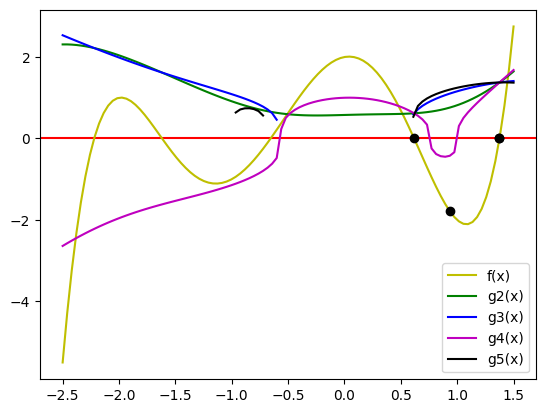

In [ ]:
# g
xs = np.linspace(-2.5, 1.5, 100)
ys = f(xs)
dictionary = {
    'x': xs,
    'y': ys
}
plt.axhline(y=0, color='r')
plt.plot(xs, f(xs), label='f(x)', color='y')
plt.plot(xs, g2(xs), label='g2(x)', color='g')
plt.plot(xs, g3(xs), label='g3(x)', color ='b')
plt.plot(xs, g4(xs), label='g4(x)', color = 'm' )
plt.plot(xs, g5(xs), label='g5(x)', color = 'k' )
plt.legend()


if len(g2_a) > 0:
    root = np.array([g2_a[len(g2_a)-1], g3_a[len(g3_a)-1], g4_a[len(g4_a)-1], g5_a[len(g5_a)-1]])
    plt.plot(root, f(root), 'ko')